<a href="https://colab.research.google.com/github/vilcagamarracf/Python_Snippets/blob/main/snippets/Snippets_geemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h2> geemap Snippets - Colaboratory 👨‍🚀</h2>
<p><br>
<img src="https://www.gislounge.com/wp-content/uploads/2018/06/google-earth-engine.jpg"height="200px" hspace="10px" vspace="0px">
<br>
<i>geemap: A Python package for interactive mapping with Google Earth Engine, ipyleaflet, and ipywidgets. 
</p>
</center>

Referencias:

- Página oficial: https://geemap.org/
- Cheat Sheet: https://geemap.org/cheatsheet/
- Módulo `geemap`: https://geemap.org/geemap/?h=geemap#geemap-module
    - Aquí se encuentran los métodos disponibles de geemap.

Los ejemplos descritos en esta libreta son fácilmente replicables.

## Inicio rápido

Primero es necesario instalar geemap en Colab. `%%capture` permite ocultar la información que devuelve cada proceso de instalación del comando `!pip` y a su vez, permite usar los mismos paquetes instalados sin necesidad de reiniciar la sesión. 

In [1]:
%%capture
!pip install -U geemap # Nota: Con la actualización de ipyleaflet v0.15.0 se produjo un conflicto con geemap
# !pip install geemap==0.10.1 # Versión estable por si acaso

Seguidamente se debe ingresar con las credenciales de Google Earth Engine.

In [2]:
# Ingresa tus credenciales de Google Earth Engine para comenzar
import ee
ee.Authenticate()

# Inicio
ee.Initialize()

# Mensaje de login
print('\nYa estás logeado.')
print('GEE Version:', ee.__version__)

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=r9sJslOtKkdeVmMc3YowVyZx_0TQxQU8z0TVlGGIk78&tc=awDiDbW7y3vMHWxaqMFc_2t4qbB1MJ9g6YA4G6tStwM&cc=FG04AXMxXUV9CSq4zPZur_guX8jOJuKVdWzbk_aA61s

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWhIheEAYsFL9meepQB8sI0v7NUoyGj7KNMmJbdQgh0CI4svTo4wrYY

Successfully saved authorization token.

Ya estás logeado.
GEE Version: 0.1.315


Luego importamos geemap (ya instalado) y visualizamos el mapa interactivo.

In [3]:
import geemap
# import geemap.eefolium as geemap # Por si solo se necesita usar el mapa de folium (solo en Colab)

In [8]:
# Visualización de geemap
Map = geemap.Map(basemap='HYBRID', center=(-9.125, -74.396), zoom=5, layer_ctrl=True) # OpenStreetMap.Mapnik
# Parece que el basemap='ESRI' no funciona más
Map

Map(center=[-9.125, -74.396], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

Para mejor comprensión de `geemap` se recomienda leer su documentación ([geemap module](https://geemap.org/geemap/?h=geemap#geemap-module)).

Otro ejemplo rápido

In [11]:
# Ejemplo con imagen Landsat 8
img_ee = ee.Image('LANDSAT/LC08/C01/T1_RT/LC08_006069_20190712').multiply(0.00001)

# Centroide de una imagen (por si es necesario conocer)
# centroide = imagen.geometry().centroid().getInfo()['coordinates']    

vis_params = {'min': 0.0, 'max': 0.3, 'bands': ['B4', 'B3', 'B2']}

# Visualización
Map = geemap.Map() # basemap='HYBRID', layer_ctrl=True
Map.centerObject(img_ee, 9) # o sino usar Map.setCenter(lon, lat, zoom)
Map.addLayer(img_ee, vis_params, 'Img L8') 
Map

Map(center=[-13.014976513342877, -75.09312354369469], controls=(WidgetControl(options=['position', 'transparen…

## Explorando geemap

### Módulos en `geemap`

#### geemap.colormaps

`geemap.colormaps` es un módulo de `geemap` que permite elegir entre una cantidad variada de paletas de colores para visualizaciones, en su mayoría ya existentes de [Matplotlib: Choosing Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Documentación de `geemap.colormaps`
- https://geemap.org/notebooks/60_colormaps/
- https://geemap.org/notebooks/cartoee_colorbar/

Las paletas se usan para mejorar el entendimiento de un parámetro en la visualización por capas. 

In [ ]:
# cmp.list_colormaps() # Listar paletas
# cmp.plot_colormaps(width=12, height=0.4) # Plotear paletas

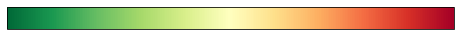

In [ ]:
# Establecer una paleta
paleta = cmp.palettes.RdYlGn_r

# Ver una paleta
cmp.plot_colormap('RdYlGn_r', width=8.0, height=0.4, orientation='horizontal')

In [ ]:
# Agregar una barra de color al mapa (Ejemplo)
# https://tutorials.geemap.org/Image/image_colorbar/

# vis_params = {'min': 0,
#               'max': 500,
#               'palette':cmp.palettes.RdYlGn_r}

# Map.add_colorbar(vis_params, discrete=True, label='R_n')

#### geemap.cartoee

**`geemap.cartoee`**
 
Es un módulo de `geemap` que permite realizar visualizaciones con ayuda de Matplotlib para obtener gráficos de tipo publicación científica. Está basado en [`cartoee`](https://github.com/kmarkert/cartoee) el cual usa Earth Engine y `cartopy`.

<center>
<p>
<img src='https://cartoee.readthedocs.io/en/latest/_images/examples_cartoee_simple_9_0.png' width='60%'>
</p>
</center>

Recursos:
- Módulo [`geemap.cartoee`](https://geemap.org/cartoee/?h=cartoee+modu#cartoee-module)
- https://github.com/KMarkert/cartoee/blob/master/cartoee/plotting.py

**Modificando atributos**

colorbar
- https://matplotlib.org/stable/api/colorbar_api.html#module-matplotlib.colorbar
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib-pyplot-colorbar
- https://github.com/giswqs/geemap/blob/e8b9afc2548a2e530072f53d97e45b261a1a644c/examples/notebooks/cartoee_colorbar.ipynb

gridlines
- https://stackoverflow.com/questions/49956355/adding-gridlines-using-cartopy

## Aplicaciones

### Filtrado rápido

1. Dibujamos una geometría con la interfaz de geemap

In [ ]:
Map = geemap.Map(basemap='HYBRID', layer_ctrl=True) # OpenStreetMap.Mapnik
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

2. Convertimos la geometría dibujada en un `ee.geometry`. Para ello, solicitaremos la información de la geometría dibujada mediante `Map.user_rois` .

Nota:
- `Map.user_roi` guarda el último polígono dibujado mientras que 
- `Map.user_rois` guarda todos los polígonos dibujado 

In [ ]:
roi = Map.user_rois.geometry()
roi.getInfo()

{'coordinates': [[[-79.420177, -6.672036],
   [-79.420177, -6.635131],
   [-79.372511, -6.635131],
   [-79.372511, -6.672036],
   [-79.420177, -6.672036]]],
 'geodesic': False,
 'type': 'Polygon'}

3. Procedemos a filtrar un `ee.ImageCollection`

In [ ]:
#@markdown 1. Selección del producto:
Product_name = 'COPERNICUS/S2_SR'  #@param ["LANDSAT/LC08/C01/T1_SR", "COPERNICUS/S2_SR"]

#@markdown 2. Seleccionamos las fechas de interés:
Start_date = '2020-01-01'  #@param {type: "date"}
End_date   = '2020-12-31'  #@param {type: "date"}

#@markdown 3. Porcentaje de Nubosidad:
Cloud_Pixel_Percentage =     10#@param {type:"number"}

#  Parametros globales
range_date = [Start_date, End_date]

if Product_name == 'COPERNICUS/S2_SR':
  img_col = (
      ee.ImageCollection(Product_name)
      .filterDate(range_date[0], range_date[1])
      .filterBounds(roi)
      .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', Cloud_Pixel_Percentage)
  )
else:
  img_col = (
      ee.ImageCollection(Product_name)
      .filterDate(range_date[0], range_date[1])
      .filterBounds(roi)
      .filterMetadata('CLOUD_COVER', 'less_than', Cloud_Pixel_Percentage)
  )

print(f'# Imágenes del producto {Product_name}: {img_col.size().getInfo()}')

# Imágenes del producto COPERNICUS/S2_SR: 15


4. Visualizamos las imágenes (o imagen)

In [ ]:
# img_col.sort('CLOUDY_PIXEL_PERCENTAGE') # En caso de ordenar por porcentaje de nubosidad

# Definir simbologia RGB
ver_imagen = img_col.first().multiply(0.0001)
vis_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0.0,
    'max': 0.3,
    # 'gamma': 0.90
}

# Visualizar en el mapa
Map = geemap.Map(layer_ctrl=True) # basemap='ESRI', 
Map.centerObject(roi, 10) # Map.setCenter(lon, lat, zoom)
Map.addLayer(ver_imagen, vis_params, name = 'Imagen Landsat8') # Map.addLayer(image, vis_params, 'SRTM DEM', True, 0.5)
Map

Map(center=[-6.65358383938573, -79.39634399999959], controls=(WidgetControl(options=['position', 'transparent_…

En caso de no haberse conseguido la imagen esperada, es posible modificar el área de estudio dibujada.

5. Exportar imagen

`geemap` solo permite descargas pequeñas (Total request size (3332596224 bytes) must be less than or equal to 33554432 bytes).

- https://geemap.org/notebooks/11_export_image/

In [ ]:
geemap.ee_export_image(image, filename='image.tif', region=roi, scale=30, file_per_band=False)

### Filtrado de `ee.FeatureCollection`

#### Límites de Países a nivel mundial en Earth Engine


`FeatureCollection.filterMetadata(name, operator, value)`

- https://developers.google.com/earth-engine/apidocs/ee-imagecollection-filtermetadata
- https://developers.google.com/earth-engine/apidocs/ee-featurecollection-filtermetadata



In [ ]:
# Perú como FeatureCollection
countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
peru = countries.filterMetadata('country_na', 'equals', 'Peru')

In [ ]:
# Visualizar
Map = geemap.Map(basemap='HYBRID')
Map.centerObject(peru, 5) # Map.setCenter(lon, lat, zoom)
Map.addLayer(peru, {"color" : "00FF11"}, name = 'Perú')
Map

Map(center=[-9.12511364697584, -74.39606230545007], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
peru.getInfo()['properties']

{'date_range': [1490832000000, 1490832000000],
 'description': '<p>The United States Office of the Geographer provides\nthe Large Scale International Boundary (LSIB) dataset. The detailed\nversion (2013) is derived from two other datasets: a LSIB line\nvector file and the World Vector Shorelines (WVS) from the National\nGeospatial-Intelligence Agency (NGA). The interior boundaries\nreflect U.S. government policies on boundaries, boundary disputes,\nand sovereignty. The exterior boundaries are derived from the\nWVS; however, the WVS coastline data is outdated and generally\nshifted from between several hundred meters to over a kilometer.\nEach feature is the polygonal area enclosed by interior boundaries\nand exterior coastlines where applicable, and many countries\nconsist of multiple features, one per disjoint region.</p><p>Compared with the detailed LSIB, in this simplified dataset some disjointed\nregions of each country have been reduced to a single feature.\nFurthermore, it exclud

In [ ]:
from pprint import pprint
pprint(peru.getInfo()['properties'])

{'date_range': [1490832000000, 1490832000000],
 'description': '<p>The United States Office of the Geographer provides\n'
                'the Large Scale International Boundary (LSIB) dataset. The '
                'detailed\n'
                'version (2013) is derived from two other datasets: a LSIB '
                'line\n'
                'vector file and the World Vector Shorelines (WVS) from the '
                'National\n'
                'Geospatial-Intelligence Agency (NGA). The interior '
                'boundaries\n'
                'reflect U.S. government policies on boundaries, boundary '
                'disputes,\n'
                'and sovereignty. The exterior boundaries are derived from '
                'the\n'
                'WVS; however, the WVS coastline data is outdated and '
                'generally\n'
                'shifted from between several hundred meters to over a '
                'kilometer.\n'
                'Each feature is the polygonal a

#### Exportar FeatureCollection: `geemap.ee_to_shp(PERU, filename= 'PERU.shp')`

In [ ]:
# Creamos una carpeta para exportar
%mkdir shp_export  

In [ ]:
# Cambiamos la carpeta del directorio
%cd shp_export/

/content/shp_export


In [ ]:
# Exportar shp Peru
geemap.ee_to_shp(peru, filename= 'PERU.shp')

Generating URL ...
Please wait ...
Data downloaded to /content/shp_export/PERU.shp


In [ ]:
# Listar archivos
%ls 

PERU.cpg  PERU.dbf  PERU.fix  PERU.prj  PERU.shp  PERU.shx


In [ ]:
out_dir = %pwd

In [ ]:
lista_archivos = os.listdir(out_dir)
lista_archivos

['PERU.shp', 'PERU.cpg', 'PERU.dbf', 'PERU.fix', 'PERU.shx', 'PERU.prj']

In [ ]:
zipName = 'shp_export.zip'

# Comprimir todos los archivos para su descarga descargar
import zipfile
my_zip = zipfile.ZipFile(zipName, mode= 'w')

for i in lista_archivos:
  my_zip.write(i)

my_zip.close()

# Descarga
from google.colab import files

files.download(zipName)

### Conversión de código JavaScript a Python


```
# El código en javascript se escribe como string de la siguiente manera:
js_snippet = """
// Load an image.
var image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318');

// Define the visualization parameters.
var vizParams = {
  bands: ['B5', 'B4', 'B3'],
  min: 0,
  max: 0.5,
  gamma: [0.95, 1.1, 1]
};

// Center the map and display the image.
Map.setCenter(-122.1899, 37.5010, 10); // San Francisco Bay
Map.addLayer(image, vizParams, 'false color composite');
"""

# Convertir de JavaScript a Python
geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True)

```
**Nota**: Solo funciona en local (jupyter notebooks o jupyterlab)



También es posible descargar el código de aplicaciones de GEE y guardarlos en archivos `.js` 

In [ ]:
geemap.download_gee_app('https://google.earthengine.app/view/linked-maps', out_file=None)

The json url: https://google.earthengine.app/javascript/linked-maps-modules.json
The JavaScript is saved at: /content/linked-maps.js


In [ ]:
geemap.download_gee_app('https://minagri-geoespacial.users.earthengine.app/view/dinamicaagricolav3',
                       out_file=None)

The json url: https://minagri-geoespacial.users.earthengine.app/javascript/dinamicaagricolav3-modules.json
The JavaScript is saved at: /content/dinamicaagricolav3.js


In [ ]:
a = 5.123456789
print(round(a,4))

5.1235


### Conversión de `.shp` a datos `ee.`

**Forma 1: Con geopandas**

En la clase, el ingeniero Nino trabaja con QGIS para dibujar una zona de estudio, obtenerlo como archivo `.shp` y luego importarlo con python para poder trabajarlo como dato `ee`. (Curso: Teledetección Google Earth Engine con Python Video 6.6 Conversión de SHP a GEE)

Con geopandas se importará el archivo en formato `.shp` y se convertirá a formato geojson, para luego ser aceptado dentro de un `ee.FeatureCollection`.

In [ ]:
%%capture
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
# leer archivo con geopandas.read_file()
zona_gpd = gpd.read_file('Archivo_shapefile.shp')
zona_gpd

In [ ]:
# Crear un featureCollection mediante GeoJSON: geopandas.read_file().__geo_interface__
ee_zona_gpd = ee.FeatureCollection(zona_gpd.__geo_interface__)
type(ee_zona_gpd) # ee.featurecollection.FeatureCollection

**Forma 2: Con geemap**

También es posible realizarlo rápidamente con `geemap` (aunque necesita importar `geopandas` para su funcionamiento).

In [ ]:
path = r'/content/shp_export/PERU.shp' # ruta del shapefile

ee_shp = geemap.shp_to_ee(path) # Lo convertirá en un ee.FeatureCollection
type(ee_shp) # ee.featurecollection.FeatureCollection

ee.featurecollection.FeatureCollection

In [ ]:
# Visualizar
Map = geemap.Map(basemap='HYBRID')
Map.centerObject(ee_shp, 5) # Map.setCenter(lon, lat, zoom)
Map.addLayer(ee_shp, {"color" : "00FF11"}, name = 'Perú')
Map

Map(center=[-9.12511364697584, -74.39606230545007], controls=(WidgetControl(options=['position', 'transparent_…

#### Ejemplo: Distrito de Chongoyape, almacenado en Drive

In [ ]:
# leer archivo con geopandas.read_file()
distritosPeru = gpd.read_file('drive/MyDrive/Archivos_SIG/Limite_Distrital/Distritos_Peru_WGS84.shp')
# distritosPeru

# Filtrar el distrito
lim_chongoyape = distritosPeru[distritosPeru.NOMBDIST == 'CHONGOYAPE']

# Crear un featureCollection mediante GeoJSON: geopandas.read_file().__geo_interface__
ee_chongoyape = ee.FeatureCollection(lim_chongoyape.__geo_interface__)
type(ee_chongoyape) # ee.featurecollection.FeatureCollection

ee.featurecollection.FeatureCollection

In [ ]:
# @markdown Visualización con `geemap`: Departamento de Lambayeque

# 24 Departamentos del Perú
shpPeru = ee.FeatureCollection('users/CesarVilca/Departamentos_Peru')
shpChongoyape = ee.FeatureCollection('users/CesarVilca/Distritos_Peru_WGS84')

# Departamento de Lambayeque
shpDep = shpPeru.filter(ee.Filter.eq('NOMBDEP', 'LAMBAYEQUE'))

# Geometrías
roiPeru = shpPeru.geometry()
roiDep  = shpDep.geometry()

# https://htmlcolors.com/ para modificar el color
roiPeruDraw = shpPeru.draw(
    color = "D8EED0", strokeWidth = 1, pointRadius = 2) 
roiDepDraw  = shpDep.draw(
    color = "00FF00", strokeWidth = 2, pointRadius = 2) 
roiChongoyapeDraw  = ee_chongoyape.draw(
    color = "00FFFF", strokeWidth = 2, pointRadius = 2) 

# Visualización: geemap
Map = geemap.Map(basemap='HYBRID', layer_ctrl=True) # OpenStreetMap.Mapnik
Map.centerObject(ee_chongoyape, 9) # Map.setCenter(lon, lat, zoom)
Map.addLayer(roiPeruDraw, {}, name = 'Perú')
Map.addLayer(roiDepDraw, {}, name = 'Lambayeque')
Map.addLayer(roiChongoyapeDraw, {}, name = 'Chongoyape')

Map

Map(center=[-6.626857372606788, -79.4645728499761], controls=(WidgetControl(options=['position', 'transparent_…

### Split map panel

[geemap - Split map panel](https://geemap.org/notebooks/04_split_panel_map/)

In [ ]:
Map = geemap.Map()
Map.split_map(left_layer='HYBRID', right_layer='ROADMAP')
Map

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
nlcd_2001 = ee.Image('USGS/NLCD/NLCD2001').select('landcover')
nlcd_2016 = ee.Image('USGS/NLCD/NLCD2016').select('landcover')

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2016, {}, 'NLCD 2016')

Map = geemap.Map()
Map.split_map(left_layer, right_layer)
Map

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### Ejemplo: NDVI para el Distrito de Chongoyape, Chiclayo, Lambayeque.

1. Generamos un reporte a partir de un dataset de imágenes de satélite (caso Sentinel-2) para un determinado año. 

In [ ]:
# @markdown Función: `generar_reporte_S2_SR(roi, year)`

import pandas as pd

def generar_reporte_S2_SR(roi, year):

  ID_snippet_name = 'COPERNICUS/S2_SR'

  ## Filtrado de ee.imageCollection
  icol_sr = (
      ee.ImageCollection(ID_snippet_name)\
      .filterDate(str(year), str(year+1))\
      .filterBounds(roi)
  )

  ## Generando campos para la tabla
  # Lista con fechas (en milisegundos)
  lista_fechas = icol_sr.aggregate_array('system:time_start').getInfo()

  # Lista con ID's
  imgCol_ids = [f'{ID_snippet_name}/{i}' for i in icol_sr.aggregate_array("system:index").getInfo()]

  # Tabla con pandas
  # import pandas as pd

  df = pd.DataFrame(lista_fechas, columns = ['millis'])

  df['Sentinel-2 ID'] = imgCol_ids
  df['Timestamp'] = pd.to_datetime(df['millis'], unit='ms')
  df['Fecha Precisa'] = pd.DatetimeIndex(df['Timestamp']) # Con hora
  df['Fecha Corta'] = pd.DatetimeIndex(df['Timestamp']).date
  df['Año'] = pd.DatetimeIndex(df['Timestamp']).year
  df['Mes'] = pd.DatetimeIndex(df['Timestamp']).month
  df['Día'] = pd.DatetimeIndex(df['Timestamp']).day
  df['Hora'] = pd.DatetimeIndex(df['Timestamp']).hour
  df['Día Juliano'] = pd.DatetimeIndex(df['Timestamp']).dayofyear
  # df['Sensor'] = 'OLI/TIRS'
  
  df["Zenith Angle"] = icol_sr.aggregate_array('MEAN_SOLAR_ZENITH_ANGLE').getInfo()
  df["Porcentaje Nubes (%)"] = icol_sr.aggregate_array('CLOUDY_PIXEL_PERCENTAGE').getInfo()
  
  df = df.drop(columns=['millis', 'Timestamp'])
  # df.to_csv('datos_2020_L8_SR.csv')

  return df # ,icol_sr

2. Generamos una función que mapee el NDVI de cada imagen.

In [ ]:
# @markdown Función NDVI: `ndvi_icol(image)`

def ndvi_icol(image):
  ndvi = image.expression(
      '(nir - red) / (nir + red)',
      {'red' : image.select('B4').divide(10000),
       'nir' : image.select('B8').divide(10000)}).rename('NDVI')
  return ndvi

# def ndvi_icol(image):
#   ndvi = image.normalizedDifference(['B8','B4']).rename('ndvi')
#   return image.addBands([ndvi])

3. Establecemos paletas de colores para mejor visualización.

In [ ]:
# @markdown Paletas de colores para NDVI y EVI
#------------- Paletas de NDVI ---------------------------------------
# @markdown - `BWG` : Blue, White, Green para valores -1 a 1
BWG = ['blue', 'white', 'green']

# @markdown - `ndviPalette02` : GIMMS NDVI From AVHRR Sensors (3rd Generation)
# https://developers.google.com/earth-engine/datasets/catalog/NASA_GIMMS_3GV0?hl=en
GIMMS_NDVI = ['000000', 'f5f5f5', '119701']

# @markdown - `ndviPalette03` : MOD13A1.006 Terra Vegetation Indices 16-Day Global 500m
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13A1?hl=en#description
ndviPalette03 = [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
]

# @markdown - `yuri_ndvi_pal` : Paleta NDVI (Yuri SIG) 20 Colores
yuri_ndvi_pal = [
    'ffffff', 'fffcff', 'fff9ff', 'fff7ff', 'fff4ff', 'fff2ff', 'ffefff',
    'ffecff', 'ffeaff', 'ffe7ff', 'ffe5ff', 'ffe2ff', 'ffe0ff', 'ffddff',
    'ffdaff', 'ffd8ff', 'ffd5ff', 'ffd3ff', 'ffd0ff', 'ffceff', 'ffcbff',
    'ffc8ff', 'ffc6ff', 'ffc3ff', 'ffc1ff', 'ffbeff', 'ffbcff', 'ffb9ff',
    'ffb6ff', 'ffb4ff', 'ffb1ff', 'ffafff', 'ffacff', 'ffaaff', 'ffa7ff',
    'ffa4ff', 'ffa2ff', 'ff9fff', 'ff9dff', 'ff9aff', 'ff97ff', 'ff95ff',
    'ff92ff', 'ff90ff', 'ff8dff', 'ff8bff', 'ff88ff', 'ff85ff', 'ff83ff',
    'ff80ff', 'ff7eff', 'ff7bff', 'ff79ff', 'ff76ff', 'ff73ff', 'ff71ff',
    'ff6eff', 'ff6cff', 'ff69ff', 'ff67ff', 'ff64ff', 'ff61ff', 'ff5fff',
    'ff5cff', 'ff5aff', 'ff57ff', 'ff55ff', 'ff52ff', 'ff4fff', 'ff4dff',
    'ff4aff', 'ff48ff', 'ff45ff', 'ff42ff', 'ff40ff', 'ff3dff', 'ff3bff',
    'ff38ff', 'ff36ff', 'ff33ff', 'ff30ff', 'ff2eff', 'ff2bff', 'ff29ff',
    'ff26ff', 'ff24ff', 'ff21ff', 'ff1eff', 'ff1cff', 'ff19ff', 'ff17ff',
    'ff14ff', 'ff12ff', 'ff0fff', 'ff0cff', 'ff0aff', 'ff07ff', 'ff05ff',
    'ff02ff', 'ff00ff', 'ff00ff', 'ff0af4', 'ff15e9', 'ff1fdf', 'ff2ad4',
    'ff35c9', 'ff3fbf', 'ff4ab4', 'ff55aa', 'ff5f9f', 'ff6a94', 'ff748a',
    'ff7f7f', 'ff8a74', 'ff946a', 'ff9f5f', 'ffaa55', 'ffb44a', 'ffbf3f',
    'ffc935', 'ffd42a', 'ffdf1f', 'ffe915', 'fff40a', 'ffff00', 'ffff00',
    'fffb00', 'fff700', 'fff300', 'fff000', 'ffec00', 'ffe800', 'ffe400',
    'ffe100', 'ffdd00', 'ffd900', 'ffd500', 'ffd200', 'ffce00', 'ffca00',
    'ffc600', 'ffc300', 'ffbf00', 'ffbb00', 'ffb700', 'ffb400', 'ffb000',
    'ffac00', 'ffa800', 'ffa500', 'ffa500', 'f7a400', 'f0a300', 'e8a200',
    'e1a200', 'd9a100', 'd2a000', 'ca9f00', 'c39f00', 'bb9e00', 'b49d00',
    'ac9c00', 'a59c00', '9d9b00', '969a00', '8e9900', '879900', '7f9800',
    '789700', '709700', '699600', '619500', '5a9400', '529400', '4b9300',
    '439200', '349100', '2d9000', '258f00', '1e8e00', '168e00', '0f8d00',
    '078c00', '008c00', '008c00', '008700', '008300', '007f00', '007a00',
    '007600', '007200', '006e00', '006900', '006500', '006100', '005c00',
    '005800', '005400', '005000', '004c00'
]


#------------- Paletas de EVI ---------------------------------------
evi_palette = [
    'ffffff', 'fcd163', '99b718', '66a000', '3e8601', '207401', '056201',
    '004c00', '011301'
]

ndvi_palette = [
    "#051852", "#FFFFFF", "#C7B59B", "#A8B255", "#A3C020", "#76AD00",
    "#429001", "#006400", "#003B00", "#000000"
]

4. Con interact presentamos de manera interactiva las imágenes de NDVI.

In [ ]:
# @markdown Ver NDVI Mensual: `ver_ndvi_mensual(df, mes, img)`
def ver_ndvi_mensual(df, mes, img):
  lista_imgs = df['Sentinel-2 ID'][df['Mes'] == mes].tolist()
  print(f'{len(lista_imgs)} imágenes en el mes')

  imagen_str = lista_imgs[img-1]
  imagen_ee = ee.Image(imagen_str)
  imagen_ndvi = ndvi_icol(imagen_ee)
  imagen_rgb = imagen_ee.multiply(0.0001)

  print(f'Fecha: {mes}/{imagen_str[23:25]}')
  # Visualización
  vis_rgb = {'min': 0.0, 'max': 0.3, 'bands': ['B4', 'B3', 'B2']} 
  viz_params = {'min':-0.3, 'max':0.3, 'palette': yuri_ndvi_pal} #paleta}

  left_layer = geemap.ee_tile_layer(imagen_rgb, vis_rgb, 'RGB')
  right_layer = geemap.ee_tile_layer(imagen_ndvi, viz_params, 'NDVI')

  Map = geemap.Map(layer_ctrl=True) # basemap='OpenStreetMap.Mapnik'
  Map.split_map(left_layer, right_layer)
  Map.centerObject(chongoyape, 12)  # Map.setCenter(-79.809, -6.746, 9)
  Map.addLayer(chongoyape, {'color':'00FF00'}, 'Chongoyape') # roiChongoyapeDraw

  # Barra de color
  vmin = viz_params['min']
  vmax = viz_params['max']
  colors = viz_params['palette']
  Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name="NDVI")
  # Map.add_legend(builtin_legend='NLCD')

  return Map

In [ ]:
from ipywidgets import interact, fixed

In [ ]:
# chongoyape = ee.Geometry.Point([-79.389, -6.639])

df1 = generar_reporte_S2_SR(chongoyape, year=2021)
mes = df1['Mes'].unique().tolist()

interact(ver_ndvi_mensual, df=fixed(df1), mes=mes, img=(1,7,1));

interactive(children=(Dropdown(description='mes', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), value=1), IntSl…

In [ ]:
# Para modificar la leyenda
help(geemap.Map.add_colorbar_branca)

Help on function add_colorbar_branca in module geemap.geemap:

add_colorbar_branca(self, colors, vmin=0, vmax=1.0, index=None, caption='', categorical=False, step=None, height='45px', transparent_bg=False, position='bottomright', layer_name=None, **kwargs)
    Add a branca colorbar to the map.
    
    Args:
        colors (list): The set of colors to be used for interpolation. Colors can be provided in the form: * tuples of RGBA ints between 0 and 255 (e.g: (255, 255, 0) or (255, 255, 0, 255)) * tuples of RGBA floats between 0. and 1. (e.g: (1.,1.,0.) or (1., 1., 0., 1.)) * HTML-like string (e.g: “#ffff00) * a color name or shortcut (e.g: “y” or “yellow”)
        vmin (int, optional): The minimal value for the colormap. Values lower than vmin will be bound directly to colors[0].. Defaults to 0.
        vmax (float, optional): The maximal value for the colormap. Values higher than vmax will be bound directly to colors[-1]. Defaults to 1.0.
        index (list, optional):The values corr

### Obtener estadísticas descriptivas de una imagen

`reduceRegion`
- Caso: Contar pixeles totalmente dentro de una region: https://gis.stackexchange.com/questions/356760/earthengine-count-number-of-fully-covered-pixels-within-a-region
- Que sucede cuando hay más pixeles de los que puede analizar earth engine: https://developers.google.com/earth-engine/tutorials/tutorial_forest_03#quantifying-forest-change-in-a-region-of-interest
- Primero rasteriza la region para luego estimar el reductor:
  > Earth Engine determines which pixels to input to the reducer by first rasterizing the region. If a scale is specified without a CRS, the region is rasterized in the image's native projection scaled to the specified resolution. If both a CRS and scale are specified, the region is rasterized based on them.

In [ ]:
# Ejemplo 1: Usando una sola imagen de input
geemap.image_stats(img_ndvi, predios_agricolas,scale=30).getInfo()

# {'max': {'NDVI': 0.8135882200981659},
#  'mean': {'NDVI': 0.6864622099454578},
#  'min': {'NDVI': 0.05773386847792513},
#  'std': {'NDVI': 0.12493349117122313},
#  'sum': {'NDVI': 985.3263200863785}}

In [ ]:
# Ejemplo 2: Usando la imagen img_productos que contiene muchas bandas
img_prod_stats_dict = geemap.image_stats(img_productos, predios_agricolas, scale=30).getInfo()
img_prod_stats = pd.DataFrame.from_dict(img_prod_stats_dict, orient='index')